# Kalorimetrie Küchentischversuch - Wärmekapazität eines Behälters

Author: Henrik Büchs

Datum: 18.11.2023

Gruppe: 58

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Wie groß ist die Wärmekapazität der verwendeten Tasse?

## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Machen Sie ein Bild von Ihrem Aufbau und nutzen Sie dieses mit zur Beschreibung.


In einer Tasse befindet sich kaltes Wasser und ein Sensor. In einem Becherglas befindet sich warmes Wasser mit dem zweiten Sensor. Nach dem Start der Messung wird gewartet, bis beide Sensoren die Temperaturen der Flüssigkeiten erreicht haben. Danach wird das warme Wasser mit dem Sensor aus dem Becherglas zum kalten Wasser hinzugegeben und mit den Sensoren leicht verrührt, um eine gleichmäßige Temperaturverteilung zu erhalten. Die Messung wird erst beendet, wenn sich die gemessenen Temperaturen beider Sensoren angeglichen haben.
<img src="figures/heat_capacity.jpg" width="800">

## Versuchsauswertung

In [1]:
import numpy as np
import h5py as h5
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib

from functions import m_json

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Wärmekapazität eines Behälters

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [2]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

path_hdf5 = "data/heat_capacity/heat_capacity.h5"

# DONE #

In [3]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
# HINT: You can find information about how to access to H5 Files in the README of your Repo.

f = h5.File(path_hdf5, "r")
keys = list(f['RawData'].keys())
data = f['RawData']

# DONE #

#### (ii) Daten ploten

Text(0, 0.5, 'temperatur [°C]')

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


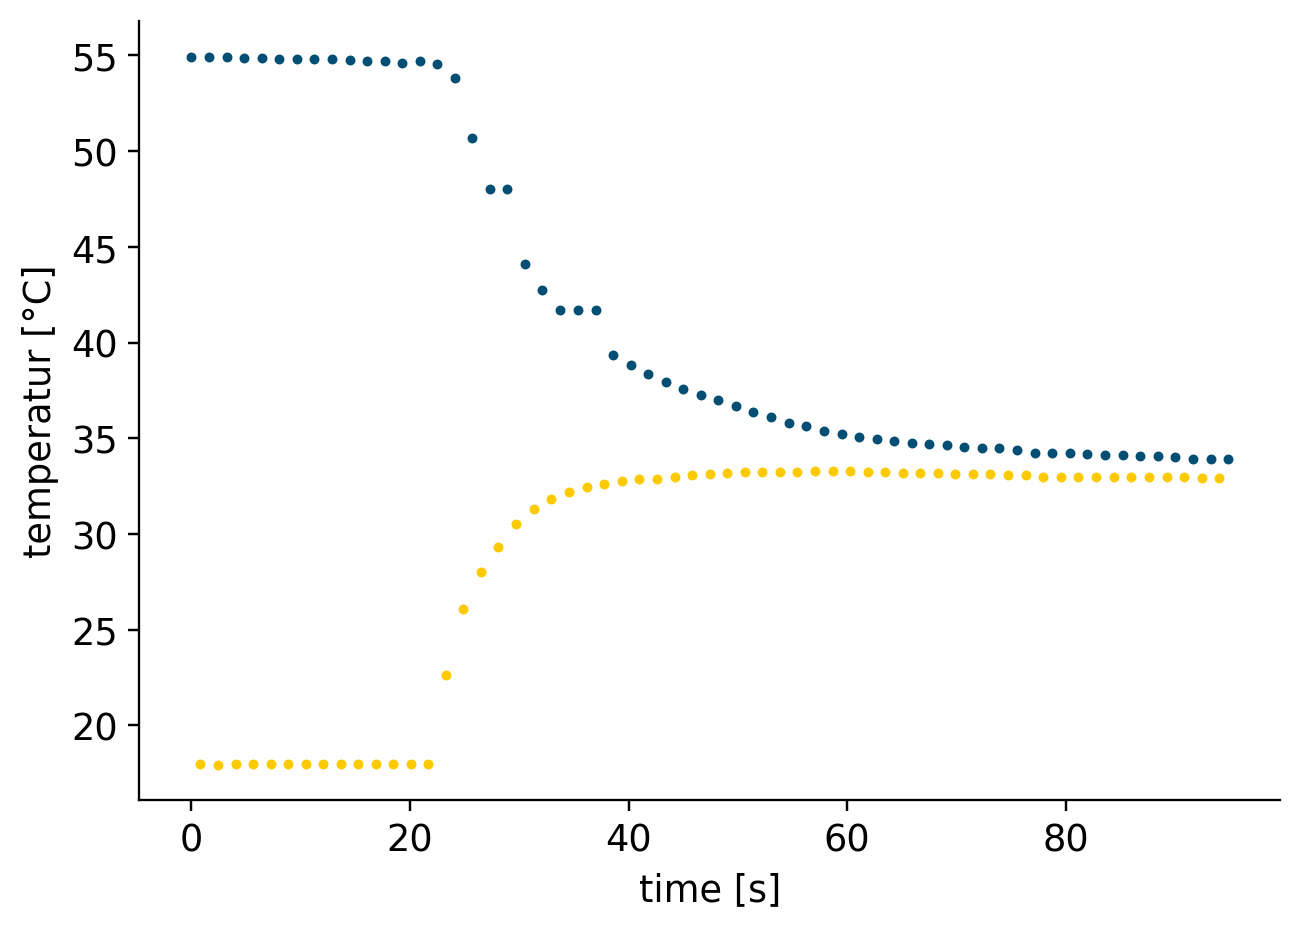

In [4]:
# TODO: Use the temperature and time data for plotting
start = data[keys[0]]['timestamp'][0] # Startzeit auslesen

j = 0
timestamps = [] # Liste für Zeiten vorbereiten
for i in data[keys[0]]['timestamp']:
    timestamps.append(data[keys[0]]['timestamp'][j] - start) # Zeit relativ zur Startzeit in Liste schreiben
    j = j + 1
    
plt.scatter(timestamps, data[keys[0]]['temperature'], s=5) # Daten des ersten Sensors plotten

j = 0
timestamps = []
for i in data[keys[1]]['timestamp']:
    timestamps.append(data[keys[1]]['timestamp'][j] - start) # Zeit relativ zur Startzeit in Liste schreiben
    j = j + 1
    
plt.scatter(timestamps, data[keys[1]]['temperature'], s=5) # Daten des zweiten Sensors plotten

# Diagramm Beschriftung
plt.xlabel('time [s]')
plt.ylabel('temperatur [°C]')
# DONE #

#### (iii) Metadaten auslesen

Die notwendigen Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [5]:
# Heat capacity of Water
c_w = 4.18

# TODO: Read mass from the metadata of the experiment.
setup_path = "data/heat_capacity/setup_heat_capacity.json"
metadata = m_json.get_metadata_from_setup(setup_path) # metadaten auslesen

uuid_probe = metadata['probe']['values'] # uuid der Probe auslesen
# Massen auslesen
m_add = m_json.get_json_entry("data/heat_capacity", uuid_probe[0], ['probe','mass_content_1'])
m_cup = m_json.get_json_entry("data/heat_capacity", uuid_probe[0], ['probe','mass_content_2'])

# DONE #

#### (iV) Anfangs- und Endwert der Temperatur

In [6]:
# TODO: Calculation of temperature data necessary to determine the specific heat capacity

# einzelne Temperaturen auslesen
T_2 = data[keys[0]]['temperature'][0]
T_1 = data[keys[1]]['temperature'][0]
T_M = (data[keys[1]]['temperature'][len(timestamps)-1]+data[keys[1]]['temperature'][len(timestamps)-1])/2

# DONE #

#### (V) Wärmekapazität bestimmen
$$
C = \frac{m_{add}c_{w}(T_2-T_M)}{T_M - T_1} - m_{cup}c_{w}
$$
Dabei ist $m_{add}$ die Masse vom hinzugefügten Wasser, $T_2$ ist seine Temperatur. Die Masse vom Wasser im Behälter ist $m_{cup}$ und seine Temperatur ist $T_1$. Die Mischungstemperatur ist $T_M$. Die spezifische Wärmekapazität von Wasser ist $c_w$.

In [7]:
# TODO: Calculate heat capacity of the calorimeter

C = (m_add*c_w*(T_2-T_M))/(T_M-T_1) - m_cup*c_w

# DONE #

#### (Vi) Ergebnis

In [8]:
# TODO: Print result

print("Kapazität der Tasse [J/K]: ", C) # J pro Kelvin
f.close() # hdf5-file wieder schließen

# DONE #

Kapazität der Tasse [J/K]:  247.03974895397494


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.

Da die Wärmekapazität der Tasse berechnet ist, könnte man nun bspw. ausrechnen, wieviel Energie man bräuchte, um die Tasse auf eine bestimmte Temperatur zu erwärmen.
Ehrlicherweise verstehe ich die Formel, mit der man angeblich die Wärmekapazität der Tasse ausrechnen können soll, nicht. Um die Wärmekapazität bestimmen zu können, bräuchte man eigentlich die Temperaturverteilung in der Tasse. Am Graphen kann man sehen, dass sich die Temperaturen der beiden gleich schwerern Flüssigkeiten ungefähr in der Mitte treffen. Das lässt darauf schließen, dass die Tasse kaum Energie in Form von Wärme aufgenommen hat. Daher sehe ich nicht, wie man durch dieses Experiment auf die Wärmekapazität der Tasse schließen können soll.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Datenmanagement ist sehr aufwändig. Dieser Versuch hat mich vom Datenmanagement nicht überzeugt, aber ich kann mir gut vorstellen, dass es bei größeren Projekten mit wissenschaftlicher Relevanz durchaus sinnvoll ist. Alles in allem, habe ich aber ein besseres Gefühl für das Datenmanagement bekommen. 